# [BETA] Posterior Approximation for a Strauss model for graph (for test)

#### Proposition #0:

$$P(y | n \theta) = exp[\theta_{l0} t_{edge\_l0}(y) + \theta_{l1} t_{edge\_l1}(y) + \theta_{l2} t_{edge\_l2}(y) + \theta_{l12} t_{edge\_l\neq}(y) ] $$


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from statsmodels.graphics.tsaplots import plot_acf
from math import exp

In [3]:
def print_config(data):
        if not isinstance(data, list):
            for k, v in data.items():
                if k != 'posteriors':
                    print("{} => {}".format(k, v))
                    
def extract_from_file(path):
    with open(path, 'r') as input_file:
        data = json.load(input_file)
    if not isinstance(data, list):
        print_config(data)
        data = data['posteriors']
    theta_l0 = [d[0] for d in data]
    theta_l1 = [d[1] for d in data]
    theta_l2 = [d[2] for d in data]
    beta = [d[3] for d in data]

    
    data_frame = pd.DataFrame({'theta_l0': theta_l0,
                               'theta_l1': theta_l1,
                               'theta_l2': theta_l2,
                               'beta': beta
                              })
    
    return data_frame


def summary(data):
    col_names = data.columns.values
    for i in [25,50,75]:
        print("========== Q{} ==========".format(i))
        for _, param_name in np.ndenumerate(col_names):
            q = np.percentile(data[param_name], i)
            print("Q{} for {} parameter {}".format(i, param_name, q))
    
    
def plot_marginals(data_abc, burn_in=0, by=1):
    
    col_names = data_abc.columns.values
    
    fig, axs = plt.subplots(len(col_names), 2, figsize=(14,25))
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        # Sample parameter
        params = data_abc[param_name].tolist()[burn_in::by]

        # Distribution
        sns.distplot(params, axlabel="{} distribution ABC".format(param_name), ax=axs[i, 0])

        # Path
        axs[i, 1].plot(range(len(params)), params)
        axs[i, 1].set(xlabel='iterations', ylabel='{} parameter ABC'.format(param_name))

def plot_dist(data, burn_in=0, by=1):
    theta_l0 = data['l0'].tolist()[burn_in::by]
    theta_l1 = data['l1'].tolist()[burn_in::by]
    theta_tl2 = data['l2'].tolist()[burn_in::by]
    theta_tl12 = data['beta'].tolist()[burn_in::by]
    
    data_sampled = pd.DataFrame({'theta_l0': theta_l0,
                                 'theta_l1': theta_l1,
                                 'theta_l2': theta_l2,
                                 'beta': beta})
    
    g = sns.PairGrid(data_sampled, height=5)
    g = g.map_upper(plt.scatter)
    g = g.map_lower(sns.kdeplot, cmap="Blues_d")
    g = g.map_diag(sns.kdeplot, lw=3, legend=False)


def autocor(data_abc, burn_in=0, by=1):

    col_names = data_abc.columns.values
    fig, axs = plt.subplots(len(col_names), 1, sharex='col', sharey='row', figsize=(14,21)) 
    
    for idx, param_name in np.ndenumerate(col_names):
        i = idx[0]
        params = data_abc[param_name].tolist()[burn_in::by]
    
        plot_acf(params, ax=axs[i])
        axs[i].set_title("Autocorrelation for {} parameter".format(param_name))

### Experimentation #1

In [3]:
FILE_NAME_1 = 'assets/exp-beta1.json'
data1 = extract_from_file(FILE_NAME_1)

algo => abc_shadow
model => strauss_graph
theta0 => [1.0, 1.0, 1.0, 1.0]
theta_perf => [1.0, 1.0, 1.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


In [4]:
summary(data1)

========== Q25 ==========
Q25 for theta_l0 parameter 0.2722784425645372
Q25 for theta_l1 parameter -0.10811904084319286
Q25 for theta_l2 parameter 0.4725296307298466
Q25 for beta parameter 1.4261592935373304
========== Q50 ==========
Q50 for theta_l0 parameter 0.475947941950344
Q50 for theta_l1 parameter 0.4775205252271427
Q50 for theta_l2 parameter 0.8057602683994787
Q50 for beta parameter 1.667139385763885
========== Q75 ==========
Q75 for theta_l0 parameter 0.6851012167842687
Q75 for theta_l1 parameter 0.9038662208794563
Q75 for theta_l2 parameter 1.1333727301225736
Q75 for beta parameter 2.059181908994102


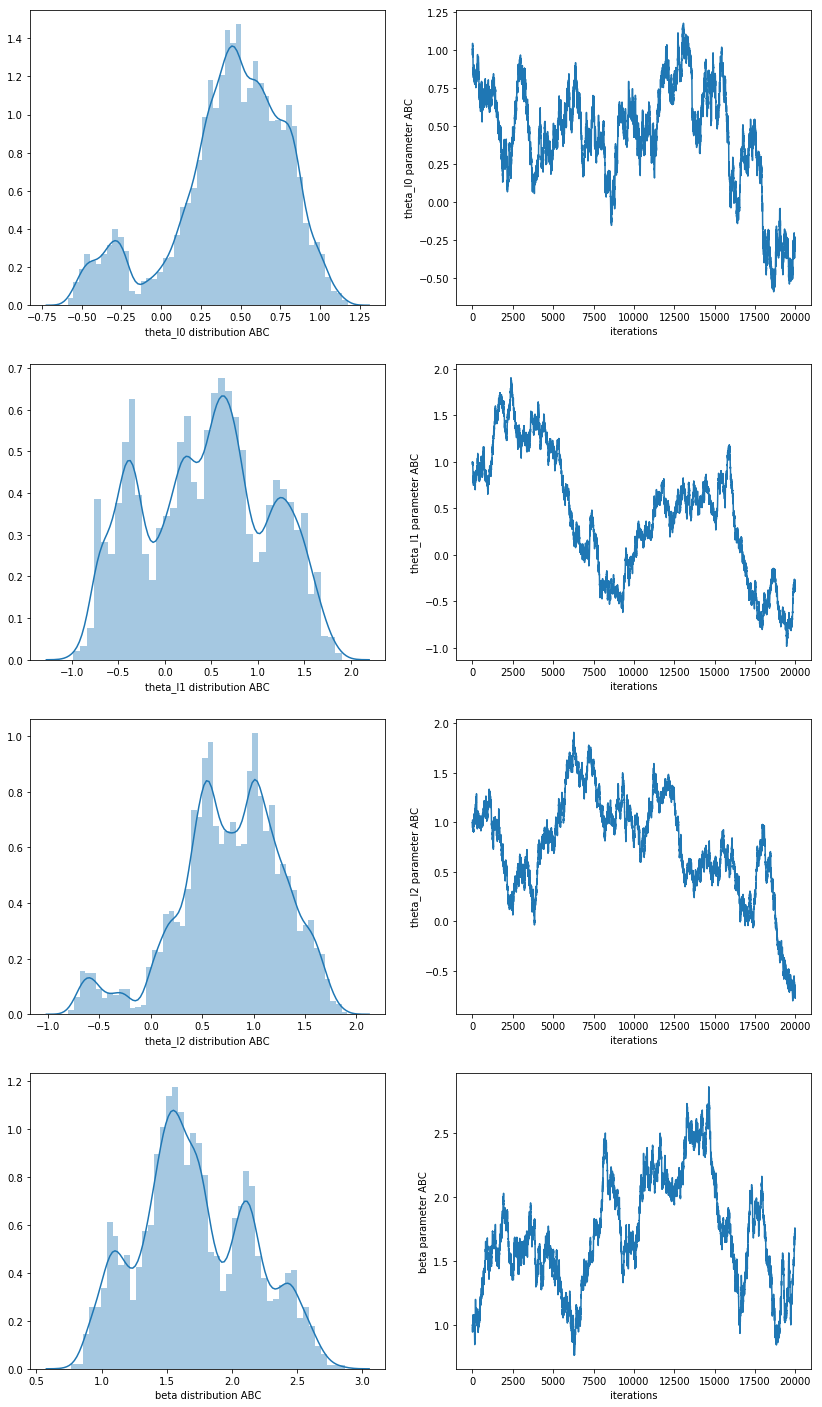

In [23]:
plot_marginals(data1)
# plt.savefig('post_interactions_marginals.pdf')

### Experimentation #2

In [24]:
FILE_NAME_2 = 'assets/exp-beta2.json'
data2 = extract_from_file(FILE_NAME_2)

algo => abc_shadow
model => strauss_graph
theta0 => [1.0, 1.0, 1.0, 1.0]
theta_perf => [1.0, 1.0, 1.0, 1.0]
iters => 200000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


In [25]:
summary(data2)

========== Q25 ==========
Q25 for theta_l0 parameter -0.6289511546564821
Q25 for theta_l1 parameter -0.8013467033778112
Q25 for theta_l2 parameter -0.2718147915580955
Q25 for beta parameter 1.420038797630891
========== Q50 ==========
Q50 for theta_l0 parameter 0.023363850599275877
Q50 for theta_l1 parameter 0.0015993309467440694
Q50 for theta_l2 parameter 0.24592416731391614
Q50 for beta parameter 1.7741245731163153
========== Q75 ==========
Q75 for theta_l0 parameter 0.5330608572112188
Q75 for theta_l1 parameter 0.7207792737509752
Q75 for theta_l2 parameter 0.7334524971542089
Q75 for beta parameter 2.195413965968024


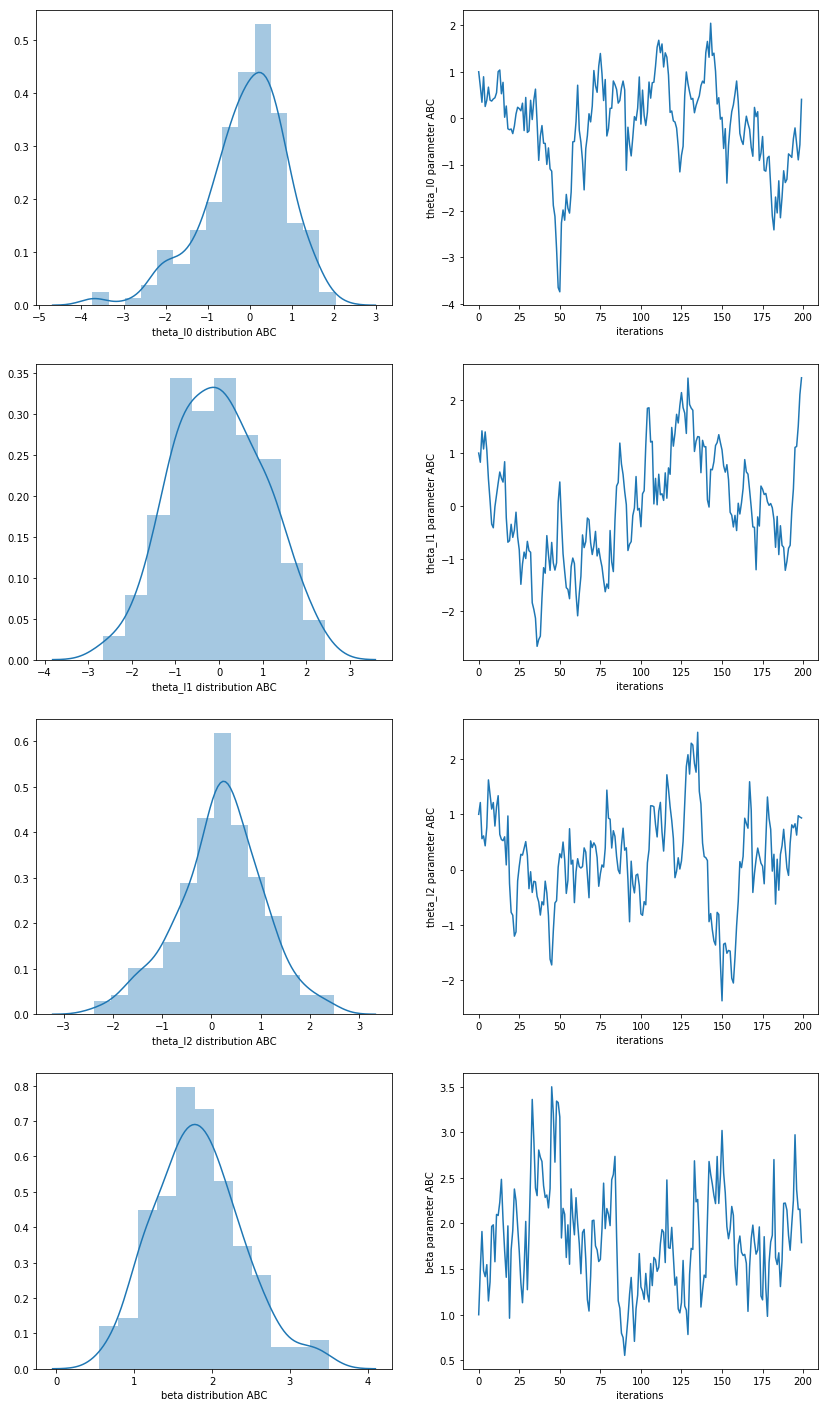

In [38]:
plot_marginals(data2, by=1000)

### Experimentation #3

In [27]:
FILE_NAME_3 = 'assets/exp-beta3.json'
data3 = extract_from_file(FILE_NAME_3)

algo => abc_shadow
model => strauss_graph
theta0 => [0.0, 0.0, 0.0, 1.0]
theta_perf => [0.0, 0.0, 0.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


In [28]:
summary(data3)

========== Q25 ==========
Q25 for theta_l0 parameter 0.0
Q25 for theta_l1 parameter 0.0
Q25 for theta_l2 parameter 0.0
Q25 for beta parameter 0.9150154012760804
========== Q50 ==========
Q50 for theta_l0 parameter 0.0
Q50 for theta_l1 parameter 0.0
Q50 for theta_l2 parameter 0.0
Q50 for beta parameter 1.1385469984033074
========== Q75 ==========
Q75 for theta_l0 parameter 0.0
Q75 for theta_l1 parameter 0.0
Q75 for theta_l2 parameter 0.0
Q75 for beta parameter 1.387562847587874


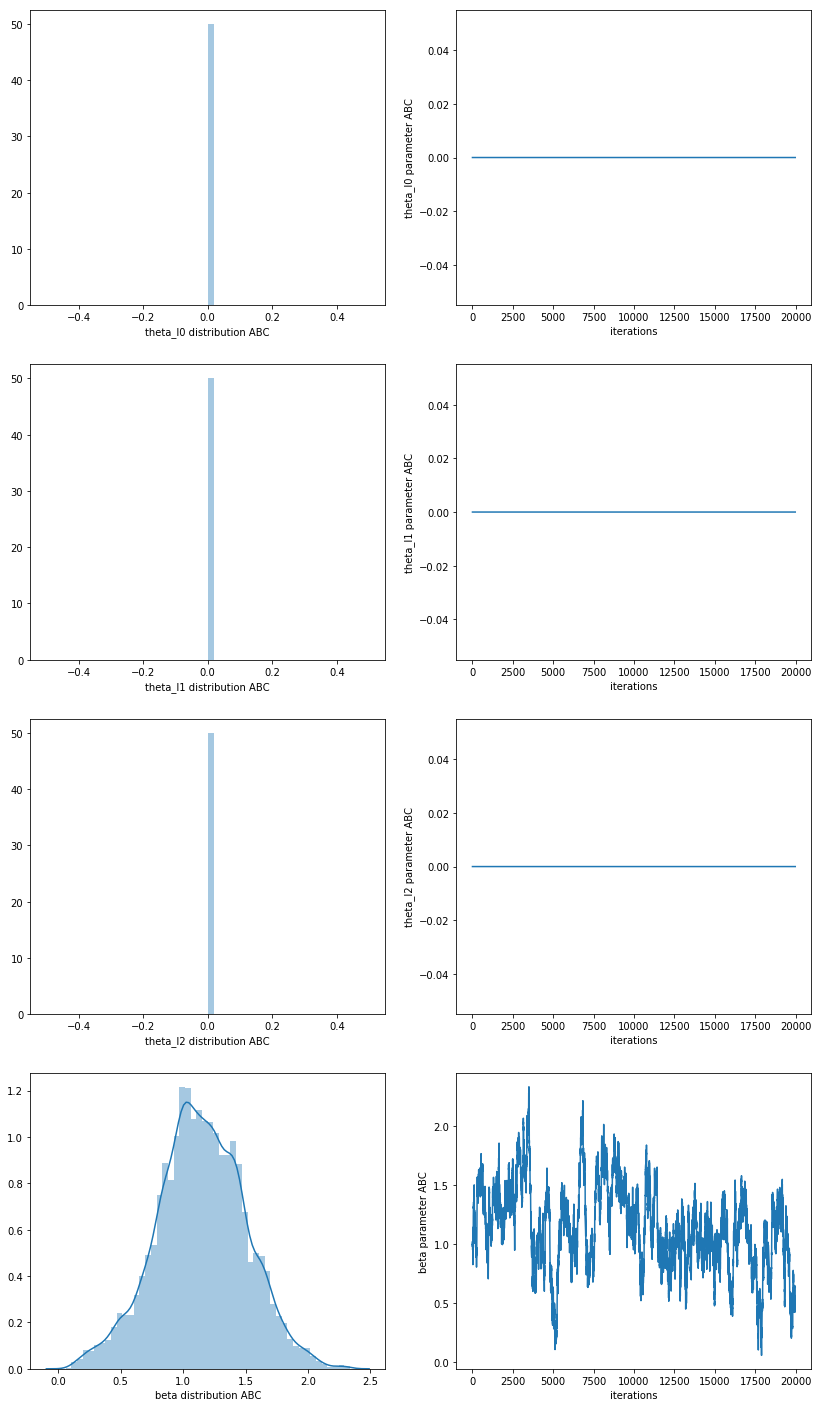

In [29]:
plot_marginals(data3, burn_in=20)

## Experiment #4

In [30]:
FILE_NAME_4 = 'assets/exp-beta4.json'
data4 = extract_from_file(FILE_NAME_4)

algo => abc_shadow
model => strauss_graph
theta0 => [1.0, 1.0, 1.0, 1.0]
theta_perf => [1.0, 1.0, 1.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


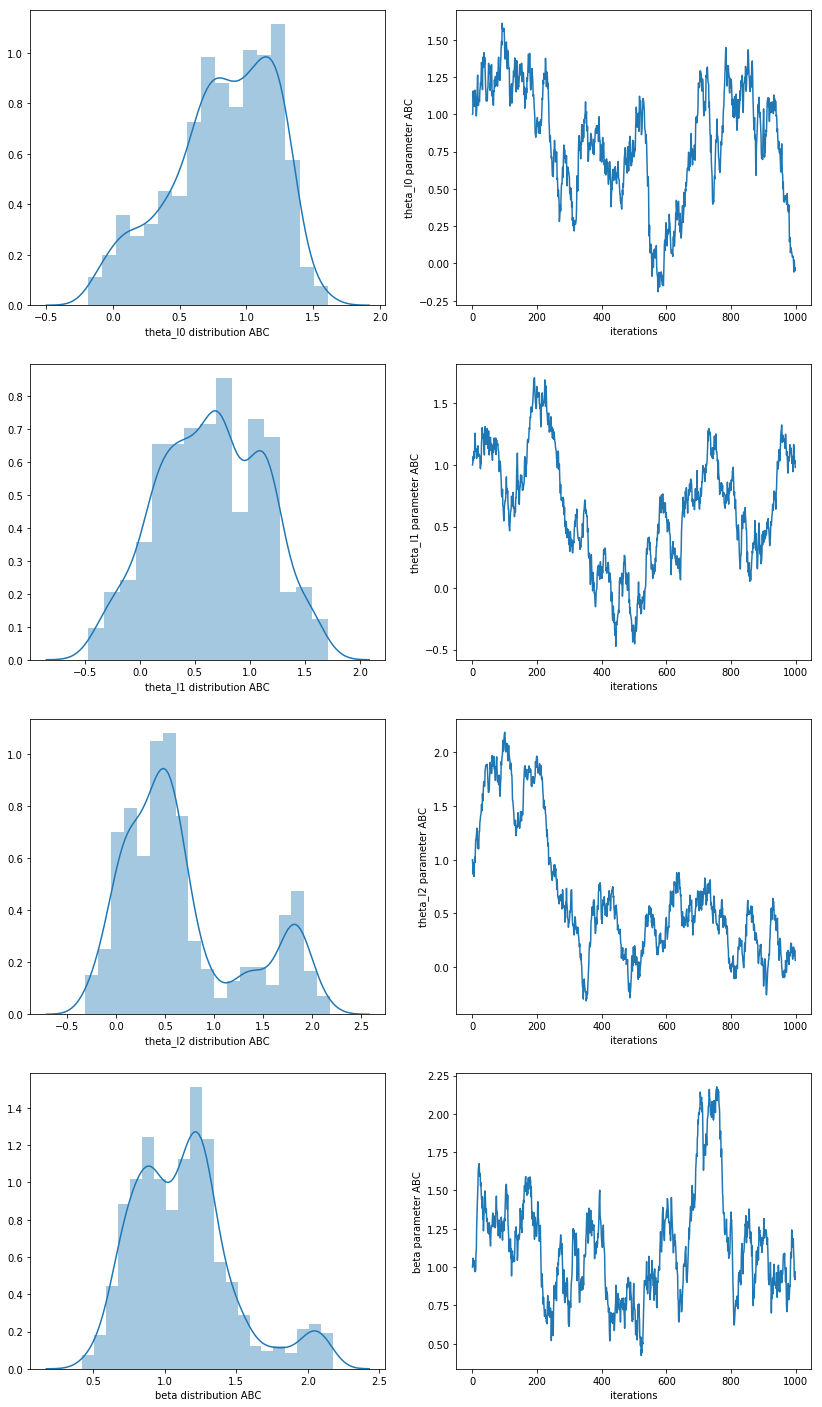

In [31]:
plot_marginals(data4, by=20)

### Experiment #5

In [32]:
FILE_NAME_5 = 'assets/exp-beta5.json'
data5 = extract_from_file(FILE_NAME_5)

algo => abc_shadow
model => strauss_graph
theta0 => [1.0, 1.0, 1.0, 1.0]
theta_perf => [1.0, 1.0, 1.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


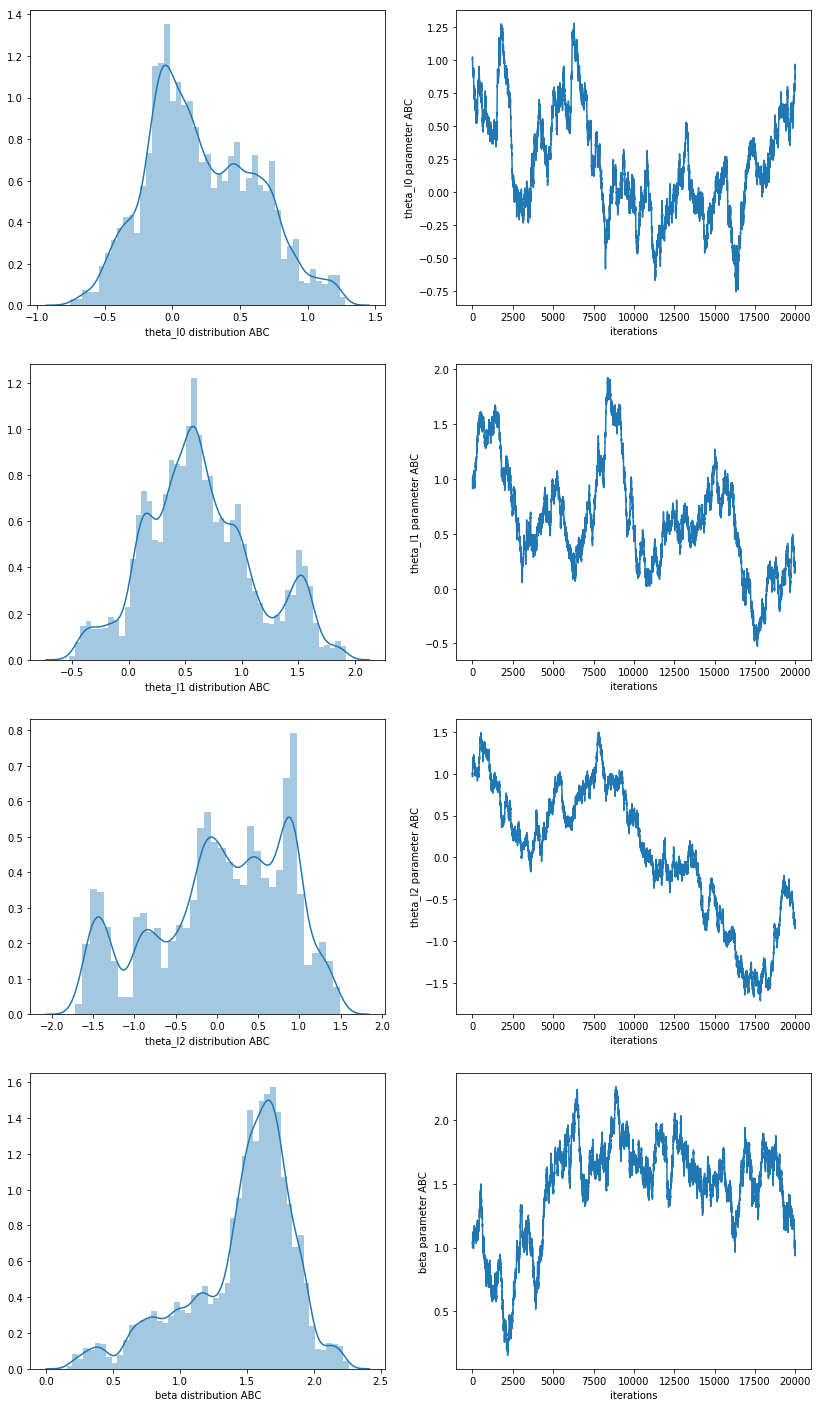

In [33]:
plot_marginals(data5)

### Experiment #5

In [34]:
FILE_NAME_6 = 'assets/exp-beta6.json'
data6 = extract_from_file(FILE_NAME_6)

algo => abc_shadow
model => strauss_graph
theta0 => [0.0, 0.0, 0.0, 1.0]
theta_perf => [0.0, 0.0, 0.0, 1.0]
iters => 20000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [15.0015, 14.9958, 15.0027, 262.114]


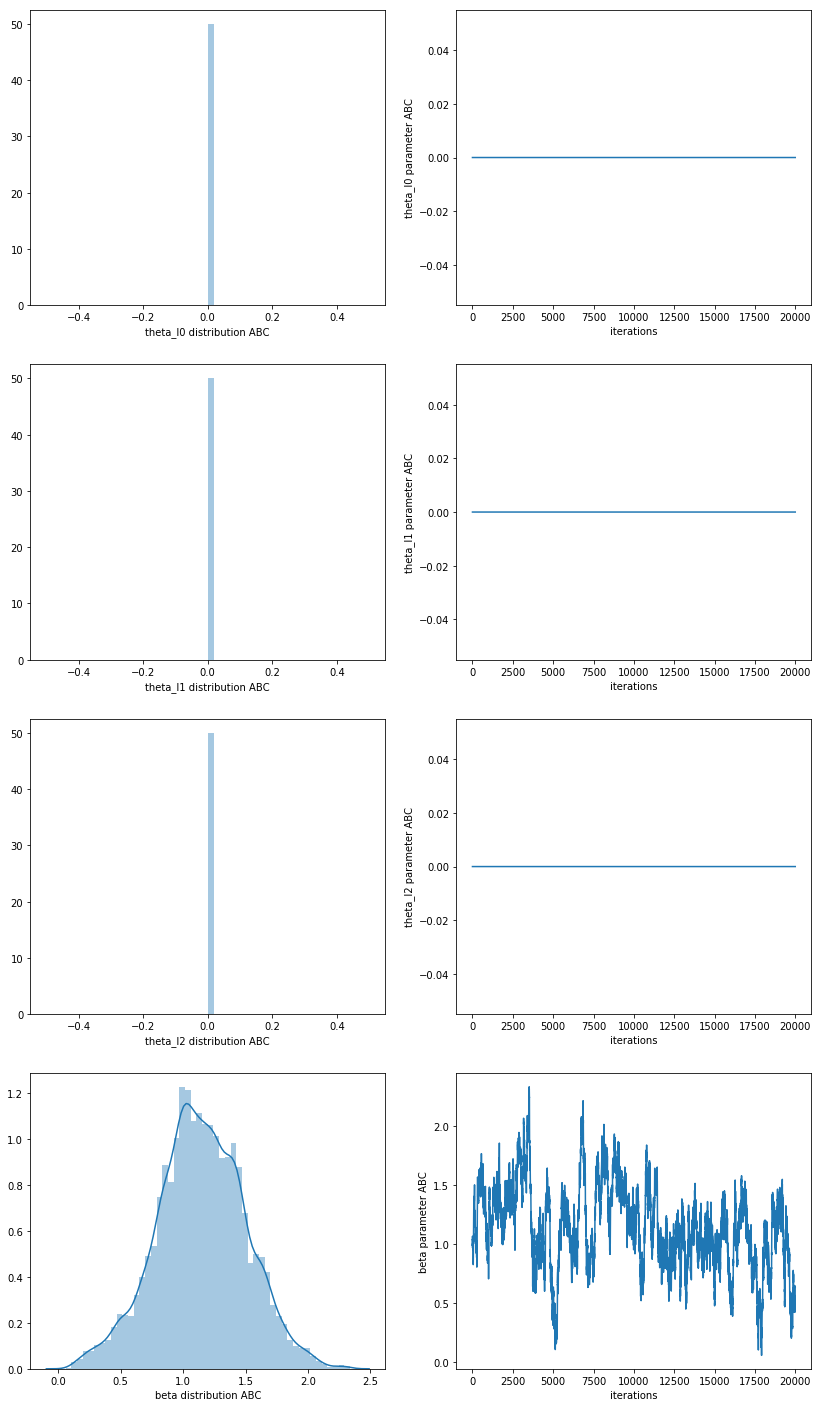

In [35]:
plot_marginals(data6)

# Prosition #1 :
$$P(y | n \theta) = exp[\theta_{l0} t_{edge\neq l0}(y) + \theta_{l1} t_{edge\_l1}(y) + \theta_{l2} t_{edge\_l2}(y) + \theta_{l12} t_{edge\_l1\neq l2}(y) ] $$

In [4]:
FILE_NAME_7 = 'assets/exp-beta7.json'
data7 = extract_from_file(FILE_NAME_7)

algo => abc_shadow
model => strauss_graph
theta0 => [4.8, 2.6, 5.0, 1.0]
theta_perf => [4.8, 2.6, 5.0, 1.0]
iters => 1000000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [16.4709, 11.6218, 16.9073, 258.7269]


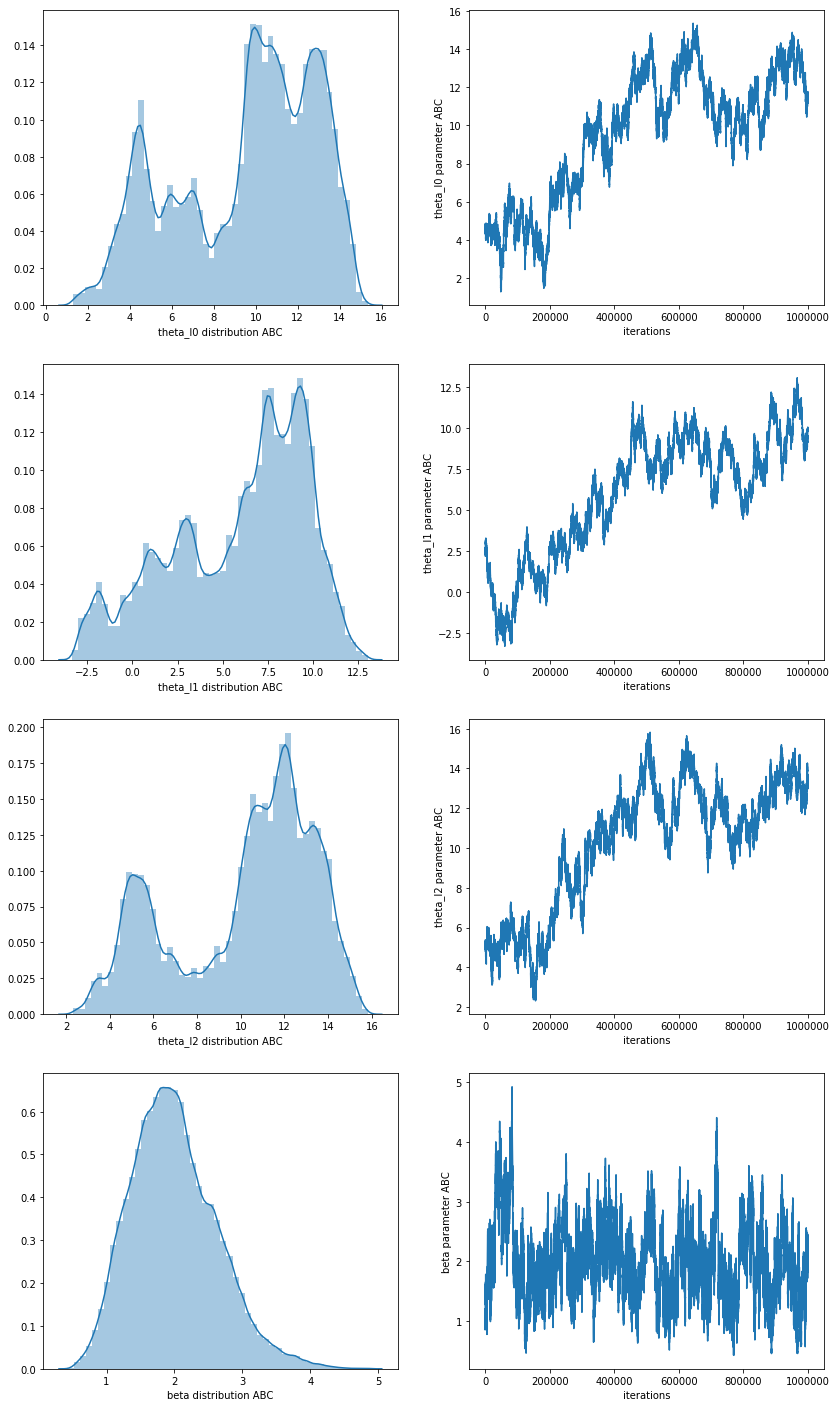

In [5]:
plot_marginals(data7)

In [12]:
FILE_NAME_8 = 'assets/exp-beta8.json'
data8 = extract_from_file(FILE_NAME_8)

algo => abc_shadow
model => strauss_graph
theta0 => [4.8, 2.6, 5.0, 1.0]
theta_perf => [4.8, 2.6, 5.0, 1.0]
iters => 1000000
n => 200
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [16.4709, 11.6218, 16.9073, 258.7269]


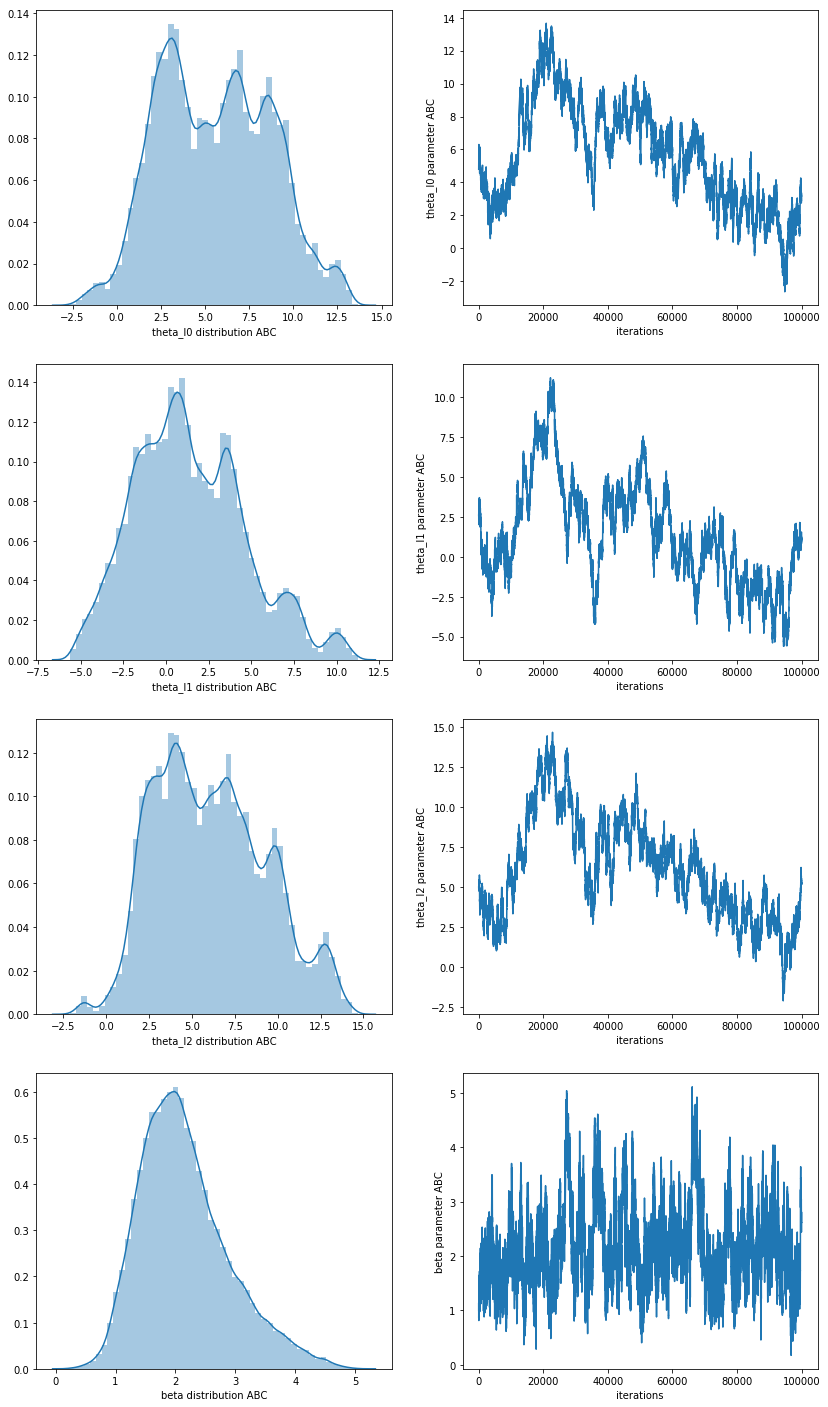

In [17]:
plot_marginals(data8, by=10)

In [4]:
FILE_NAME_9 = 'assets/exp-beta9.json'
data9 = extract_from_file(FILE_NAME_9)

algo => abc_shadow
model => strauss_graph
theta0 => [4.8, 2.6, 5.0, 1.0]
theta_perf => [4.8, 2.6, 5.0, 1.0]
iters => 1000000
n => 100
delta => [0.01, 0.01, 0.01, 0.01]
y_obs => [16.4709, 11.6218, 16.9073, 258.7269]


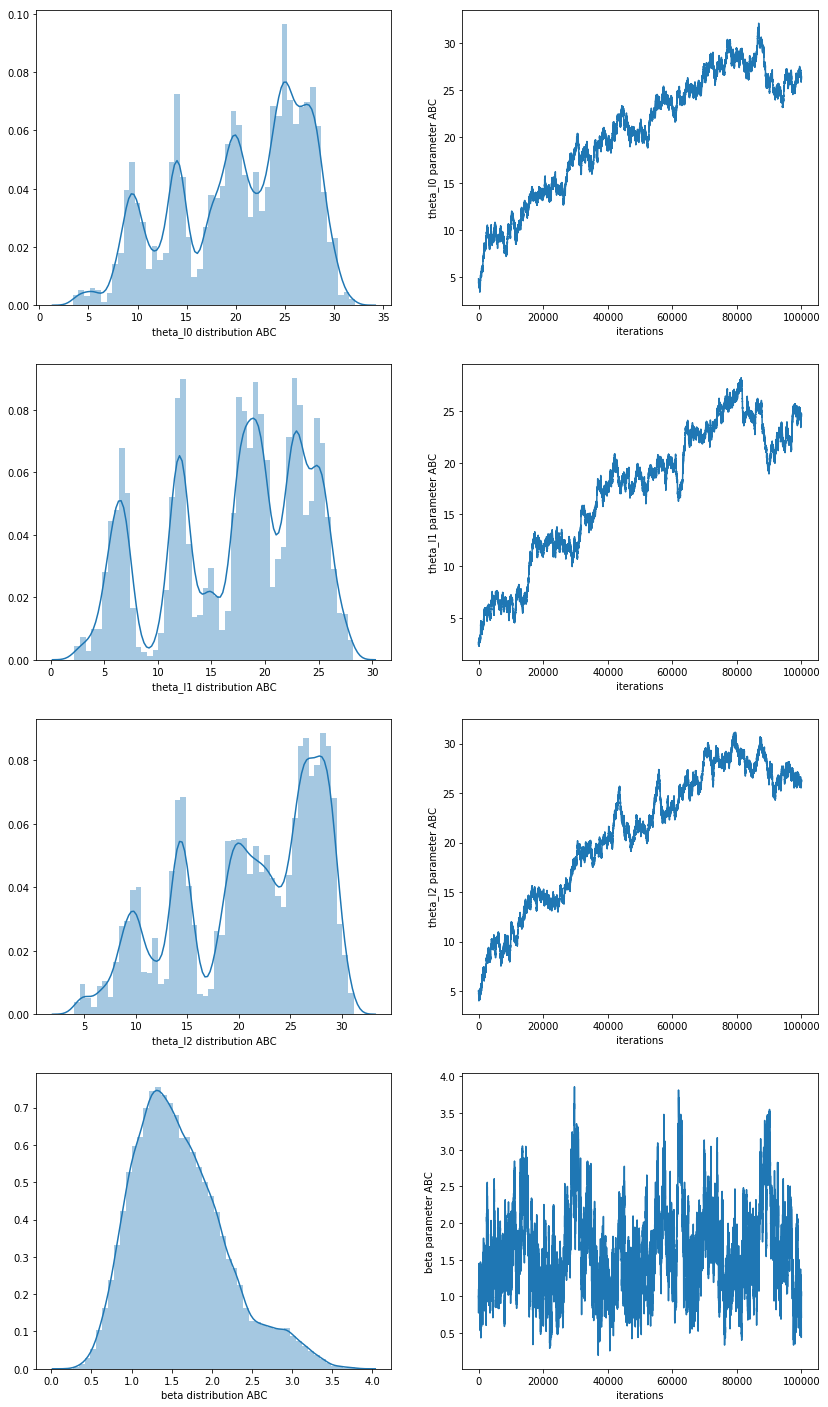

In [5]:
plot_marginals(data9, by=10)